# House Price Forecast
**W207-1 Final Project, Aug 2017**

**Team Member: **

## Summary
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## Load Data

In [4]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context = 'notebook')

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Others
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [11]:
df = pd.read_csv("C:/Users/cyhu/Desktop/w207/W207_Summer/Final Project/train.csv")
# print(df.columns)
X = df.iloc[:, :-1].values
Y = df['SalePrice'].values

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[1200:], Y[1200:]
dev_data, dev_labels = X[900:1200], Y[900:1200]
train_data, train_labels = X[:900], Y[:900]

data shape:  (1460, 80)
label shape: (1460,)


## Exploratory Analysis

In [21]:
# df.info()
# Based on initial study of variable description and personal judgement, below variables will be selected
# for further EDA in Python. Please refer to <Variable Initial Analysis.xlsx> for details.
columns = ['MSZoning', 'LotArea', 'LandContour', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType'
           , 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF'
           , 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr'
           , 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'GarageType', 'GarageCars', 'PoolArea', 'YrSold'
           , 'SaleType', 'SaleCondition', 'SalePrice']
# numerical variables
num_cols = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF'
            , 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr'
            , 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'PoolArea']
# categorical variables
cat_cols = ['MSZoning', 'LandContour', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle'
            , 'OverallQual', 'OverallCond', 'KitchenQual', 'GarageType', 'YrSold', 'SaleType', 'SaleCondition']
df1 = pd.DataFrame(df, columns=columns)
df1.head()

,MSZoning,LotArea,LandContour,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageType,GarageCars,PoolArea,YrSold,SaleType,SaleCondition,SalePrice
0,RL,8450,Lvl,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,1,Gd,8,Attchd,2,0,2008,WD,Normal,208500
1,RL,9600,Lvl,Veenker,Feedr,Norm,1Fam,1Story,6,8,...,1,TA,6,Attchd,2,0,2007,WD,Normal,181500
2,RL,11250,Lvl,CollgCr,Norm,Norm,1Fam,2Story,7,5,...,1,Gd,6,Attchd,2,0,2008,WD,Normal,223500
3,RL,9550,Lvl,Crawfor,Norm,Norm,1Fam,2Story,7,5,...,1,Gd,7,Detchd,3,0,2006,WD,Abnorml,140000
4,RL,14260,Lvl,NoRidge,Norm,Norm,1Fam,2Story,8,5,...,1,Gd,9,Attchd,3,0,2008,WD,Normal,250000


### Sales Price

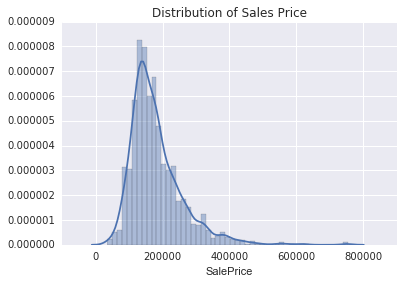

In [20]:
# summary statistics of target variable and sanity check
df1['SalePrice'].describe()

# histgram to explore distribution
# slightly right skewed but no need to transform it to get normal distribution per CLT
sns.distplot(df1['SalePrice'])
plt.title('Distribution of Sales Price')

** Sales Price vs. Numerical Variables **

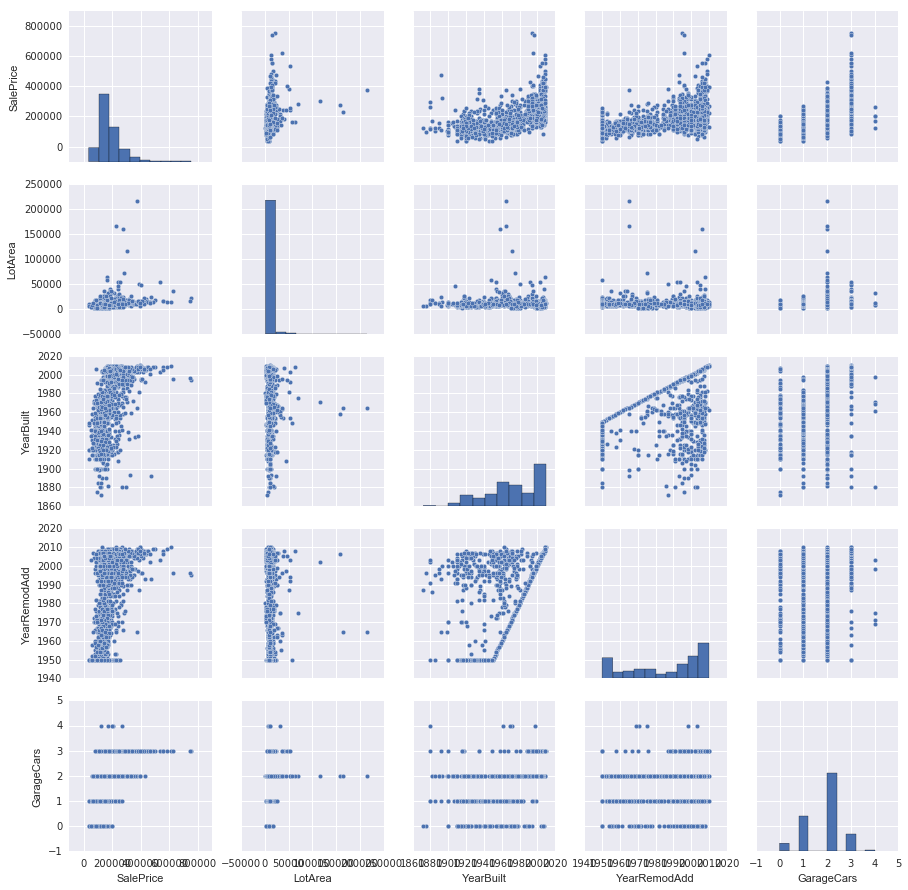

In [24]:
# relationship with numerical variables
num_cols_1 = ['SalePrice', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'GarageCars']
num_cols_2 = ['SalePrice', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath']
num_cols_3 = ['SalePrice', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'GrLivArea']
num_cols_4 = ['SalePrice', 'KitchenAbvGr', 'TotRmsAbvGrd', 'PoolArea']
sns.pairplot(df1[num_cols_1], size=2.5)

I'm surprised to see that LotArea doesn't have much impact (linear relation) on SalePrice. May need to look at LotArea distribution further as most of them fall in one bin. 
YearBuilt, YearRemodAdd and GarageCars are good indicators of SalePrice. 
YearBuild is strongly related to YearRemodAdd and may just need one variable in the model. Need to further check YearRemodAdd distribution and its relationship with YearBuild.

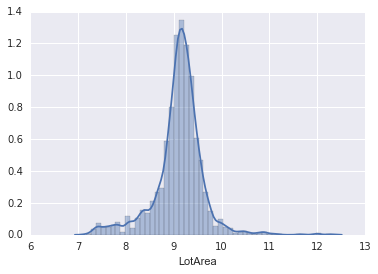

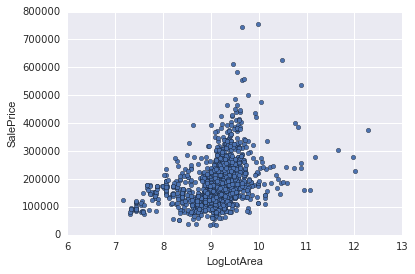

In [36]:
sns.distplot(np.log(df1['LotArea']))
df1['LotArea'].describe()
df1['LogLotArea'] = np.log(df1['LotArea'])
data = pd.concat([df1['SalePrice'], df1['LogLotArea']], axis=1)
data.plot.scatter(x='LogLotArea', y='SalePrice', ylim=(0,800000));

In [37]:
# sns.distplot(np.log(df1['LotArea']))
df1[['YearBuilt', 'YearRemodAdd']].describe()

,YearBuilt,YearRemodAdd
count,1460.000000,1460.000000
mean,1971.267808,1984.865753
std,30.202904,20.645407
min,1872.000000,1950.000000
25%,1954.000000,1967.000000
50%,1973.000000,1994.000000
75%,2000.000000,2004.000000
max,2010.000000,2010.000000


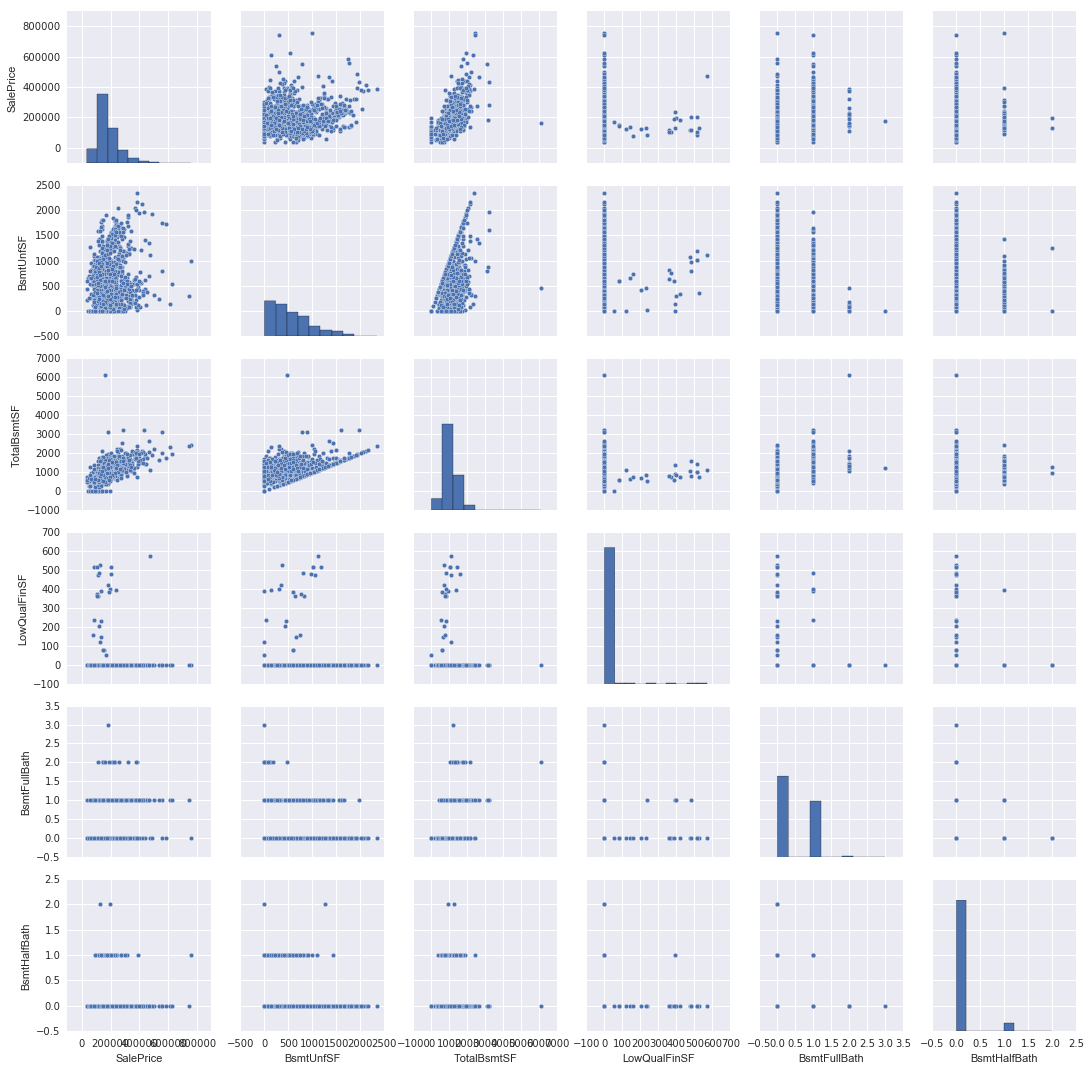

In [25]:
sns.pairplot(df1[num_cols_2], size=2.5)

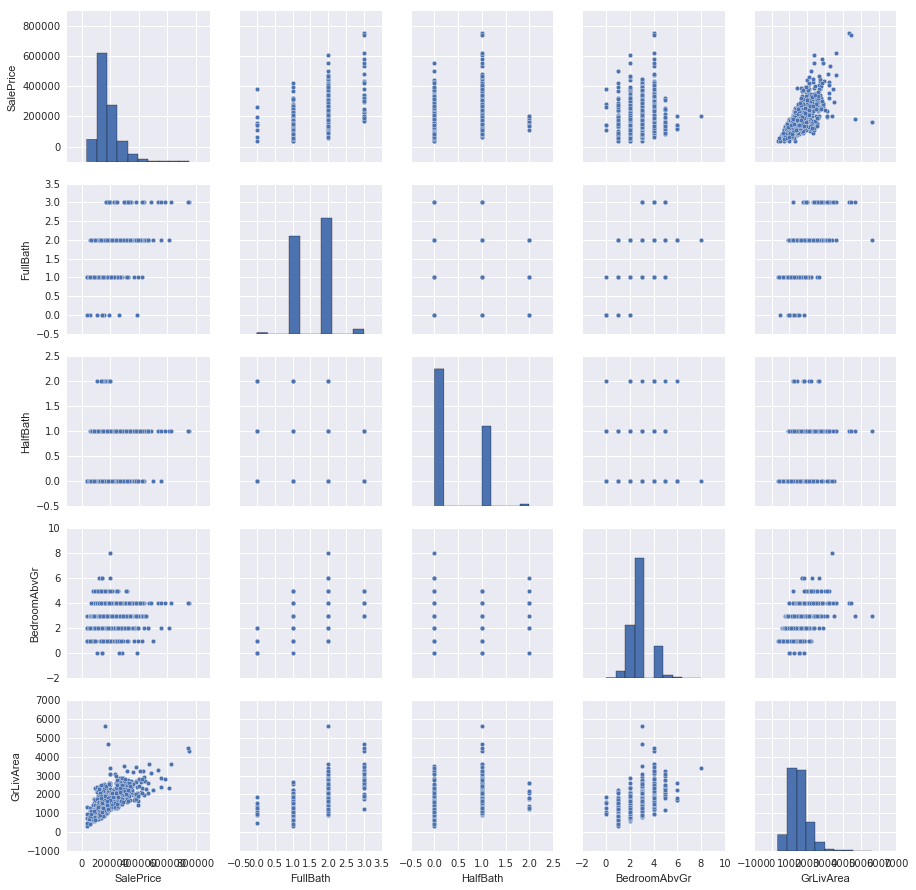

In [26]:
sns.pairplot(df1[num_cols_3], size=2.5)

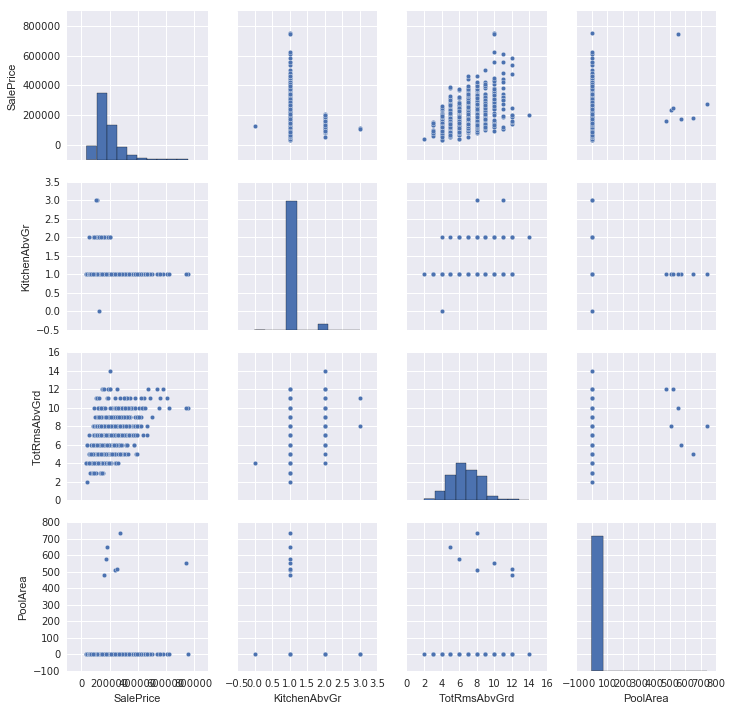

In [27]:
sns.pairplot(df1[num_cols_4], size=2.5)

** Sales Price vs. Categorical Variables **

In [ ]:
# relationship with categorical variables, using boxplot.

## Feature Engineering

## Build Models and Tuning Parameter

In [8]:
# fit a linear regression model
lr = LinearRegression()
# lr.fit(X.reshape(-1, 1), y)
# pred = lr.predict(X_test.reshape(-1, 1))
lr.fit(X, y)
pred = lr.predict(X_test)
pred

array([ 119523.73916299,  142059.63049676,  204907.54769651, ...,
         99197.88871043,   99620.67385065,  245058.5696068 ])

## Final Forecast

In [ ]:
# df_test = pd.read_csv("C:/Users/cyhu/Desktop/w207/W207_Summer/Final Project/test.csv")
# X_test = df_test[['GrLivArea','FullBath','HalfBath','BedroomAbvGr']].values
# # X_test = df_test.values
# # save the output to a csv file for submission
# test_lab_f = open("C:/Users/cyhu/Desktop/w207/W207_Summer/Final Project/test_labeled.csv", "w") # you will need to edit this directory

# test_lab_f.write("Id,SalePrice")

# idx = 1460
                 
# for pp in pred:
#     idx += 1
#     test_lab_f.write("\n")
#     test_lab_f.write(str(idx) + "," + str(int(pp)))
# test_lab_f.close()